## Import library used

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import data

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

In [57]:
data = pd.read_csv("titanic/train.csv")
data_test = pd.read_csv("titanic/test.csv")
data_gender = pd.read_csv("titanic/gender_submission.csv")

# Data Processing

### Filling missing values of dataset

In [58]:
categorical = ['Sex','Ticket','Embarked']
for i in categorical:
    print(f"number nulls of feature {i} :" + str(data[i].isnull().sum()))
Median_ages = {'Mr.': 0, 'Mrs.': 0, 'Miss.': 0, 'Master.': 0, 'Misc': 0}
Signal_Name = {'Mr.','Mrs.','Miss.','Master.','Misc.','Dr.'}
for i in Signal_Name:
    Median_ages[i] = np.ceil(data[data.Name.str.contains(i, regex=False)].Age.median())
def age(passenger):
    for i in Signal_Name:
        if np.isnan(passenger.Age):
            passenger.Age = Median_ages[i]
    return passenger
data = data.apply(age, axis="columns")
data_test = data_test.apply(age, axis="columns")
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace= True)

number nulls of feature Sex :0
number nulls of feature Ticket :0
number nulls of feature Embarked :2


### Drop unnecessary columns

In [59]:
data.drop(columns=['PassengerId','Cabin','Ticket','Name'],inplace = True)

### Graphic of features

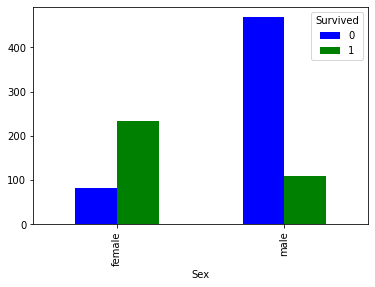

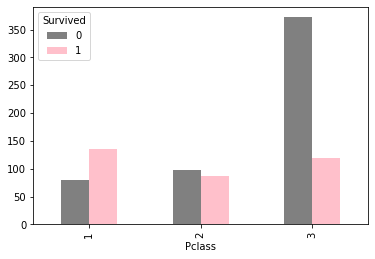

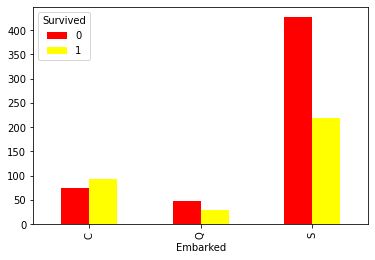

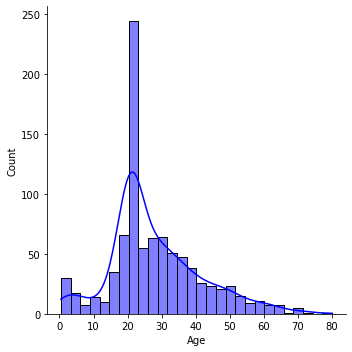

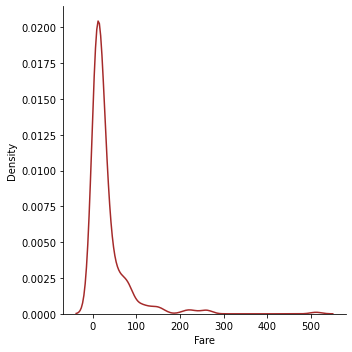

In [60]:
pd.crosstab(data.Sex,data.Survived).plot(kind = 'bar',color = ['blue','green'])
pd.crosstab(data.Pclass,data.Survived).plot(kind = 'bar',color = ['gray','pink'])
pd.crosstab(data.Embarked,data.Survived).plot(kind = 'bar',color = ['red','yellow'])
sns.displot(x = 'Age', data = data, color = 'blue', kde = True)
sns.displot(x = 'Fare', data = data,color = 'brown', kind = 'kde');

## Correlation of features in data

<AxesSubplot:>

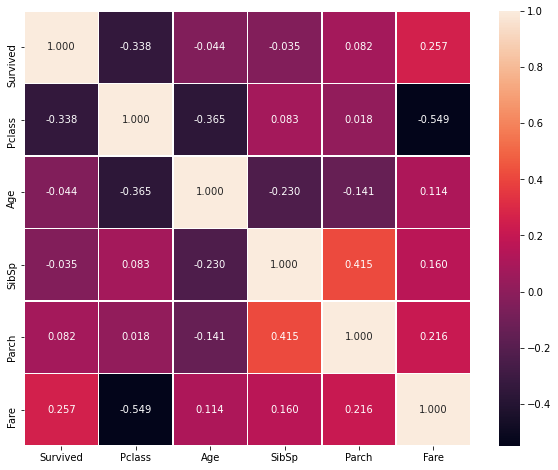

In [61]:
corre_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corre_matrix,annot=True,linewidths=0.5,fmt = ".3f")

## Train model

In [62]:
Y_train = data['Survived']
X_test = data_test.drop(columns = ['PassengerId','Cabin','Ticket','Name'],inplace = True)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(data[features])
X_test = pd.get_dummies(data_test[features])
# model = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=2)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25)

### Train some model

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model = {"Random Forest Classifier": RandomForestClassifier(),
         "Logistic Regression": LogisticRegression(),
         "Decision Tree ": DecisionTreeClassifier(),
         "KNeighbors": KNeighborsClassifier()}
np.random.seed(42)
for name,model in model.items():
    model.fit(x_train,y_train)
    print(f"Score of model {name} :" + str(model.score(x_test,y_test)))

Score of model Random Forest Classifier :0.7982062780269058
Score of model Logistic Regression :0.8116591928251121
Score of model Decision Tree  :0.8071748878923767
Score of model KNeighbors :0.8071748878923767


## Grid Search

In [65]:
from sklearn.model_selection import GridSearchCV
grid_params_RanForest = {"n_estimators":[100,200,500],
"max_depth" : [2,3,4,5],
"max_features":["auto","sqrt","log2"]}
Grid_model = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=grid_params_RanForest,cv=5)
Grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

#### Best parameters

In [66]:
Grid_model.best_params_

{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}

In [67]:
model_ran = RandomForestClassifier(max_depth=3,n_estimators=100,random_state=42)
model_ran.fit(x_train,y_train)
model_ran.score(x_test,y_test)

0.8251121076233184

## Submisstion

In [70]:
model_ran.fit(X_train, Y_train)
predictions = model_ran.predict(X_test)
submission = pd.read_csv("gender_submission.csv")
submission['Survived'] = predictions
submission.to_csv("latest_submission.csv",index=False)


